In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [16]:
kps_idx = np.array([5301,5283,5274,5265,5256,
           5202,5211,5220,5227,5247,
           3829,5077,5074,2507,5041,5054,
           1252,2449,2452,2439,25,123,
           2612,2613,2615,2617,
           3703,3223,3699,656,1096,
          2787,2703,2701,2702,176,177,250,456,185,2713,2736,2994,
          3093,3062,3045,509,538,547,3105,3102,
          3816,2699,2896,2830,2838,2841,2914,2916,2894,377,355,304,305,301,357,780,1205],dtype=int)

In [17]:
def getVerts(objfile):
    vertices = []
    for line in open(objfile, "r"):
        values = line.split()
        if(values==[]):
            continue
        if(values=='#'):
            continue
        if(values[0]=='v'):
            vertices.append([float(values[1])*100,-float(values[2])*100,float(values[3])*100])    
    verts_arr = np.array(vertices,int)
    verts_arr[...,0] = verts_arr[...,0] - np.min(verts_arr[...,0])
    verts_arr[...,1] = verts_arr[...,1] - np.min(verts_arr[...,1])
    verts_arr[...,2] = verts_arr[...,2] - np.min(verts_arr[...,2])
    return verts_arr

In [18]:
# 0：Neutral
basicVerts = getVerts('./data/Basis.obj')
base_kps = basicVerts[kps_idx,0:2]
# 1：Jaw Open
jawopenVerts = getVerts('./data/jawOpen.obj')
jawopen_kps = jawopenVerts[kps_idx,0:2]
# 2：Closed Smile
closesmileVerts = getVerts('./data/mouthSmile.obj')
closesmile_kps = closesmileVerts[kps_idx,0:2]
# 3：Smile Left
smileleftVerts = getVerts('./data/mouthSmileLeft.obj')
smileleft_kps = smileleftVerts[kps_idx,0:2]
# 4：Smile Right
smilerightVerts = getVerts('./data/mouthSmileRight.obj')
smileright_kps = smilerightVerts[kps_idx,0:2]
# 5：Mouth Frown
mouthfrownVerts = getVerts('./data/mouthFrown.obj')
mouthfrown_kps = mouthfrownVerts[kps_idx,0:2]
# 6：Lip Funnel
lipfunnelVerts = getVerts('./data/mouthFunnel.obj')
lipfunnel_kps = lipfunnelVerts[kps_idx,0:2]
# 7：Lip Pucker
lippuckerVerts = getVerts('./data/mouthPucker.obj')
lippucker_kps = lippuckerVerts[kps_idx,0:2]
# 8：Brows Up
browupVerts = getVerts('./data/browInnerUp.obj')
browup_kps = browupVerts[kps_idx,0:2]
# 9：Brows Down
browdownVerts = getVerts('./data/browDown.obj')
browdown_kps = browdownVerts[kps_idx,0:2]

keypose = [base_kps,jawopen_kps,closesmile_kps,
                    smileleft_kps,smileright_kps,mouthfrown_kps,
                    lipfunnel_kps,lippucker_kps,browup_kps,browdown_kps]

keypose = np.array(keypose)

np.save("keypose.npy",keypose)

In [19]:
#test dataset
test1Verts = getVerts('./test/test1.obj')
test1_kps = test1Verts[kps_idx,0:2]
test2Verts = getVerts('./test/test2.obj')
test2_kps = test2Verts[kps_idx,0:2]

test_kps=[]
test_kps.append(test1_kps)
test_kps.append(test2_kps)
np.save("test.npy",np.array(test_kps))

In [20]:
def drawPart(face_kps,drawimg,start,end,color,closed=True):
    for i in range(start,end+1):
        cv2.circle(drawimg,(face_kps[i,0],face_kps[i,1]),2,color,-1)
        if(i<end):
            cv2.line(drawimg,(face_kps[i,0],face_kps[i,1]),(face_kps[i+1,0],face_kps[i+1,1]),color,1)
        elif(closed):
            cv2.line(drawimg,(face_kps[end,0],face_kps[end,1]),(face_kps[start,0],face_kps[start,1]),color,1)
    return drawimg

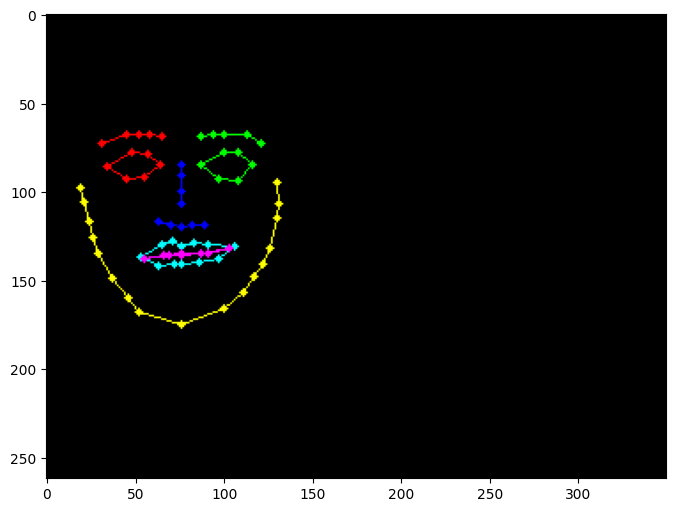

In [21]:
kps = keypose[3]
img = np.zeros((np.max(kps[...,0]*2),np.max(kps[...,1])*2,3),dtype='uint8')
img = drawPart(kps,img,0,4,(255,0,0),False) # 左眉毛，非封闭区域
img = drawPart(kps,img,5,9,(0,255,0),False) #右眉毛，非封闭区域
img = drawPart(kps,img,10,15,(255,0,0)) # 左眼
img = drawPart(kps,img,16,21,(0,255,0)) # 右眼
img = drawPart(kps,img,22,25,(0,0,255),False) # 鼻梁，非封闭区域
img = drawPart(kps,img,26,30,(0,0,255),False) # 鼻子，非封闭区域
img = drawPart(kps,img,31,42,(0,255,255)) # 外嘴唇
img = drawPart(kps,img,43,50,(255,0,255)) # 内嘴唇
img = drawPart(kps,img,51,67,(255,255,0),False) # 脸轮廓，非封闭区域

plt.figure(figsize=(8,8))
plt.imshow(img/255.0)